In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt

In [2]:
import scipy.io as sio
N = sio.loadmat('stack_N1004.mat')
N = N['stack_N1004'][:,0:50,0:50,0:50]
S = sio.loadmat('stack_S1004.mat')
S = S['stack_S1004'][:,0:50,0:50,0:50]
#N = N.stack_N100
print N.shape

(100, 50, 50, 50)


In [3]:

combined = np.concatenate((S, N), axis=0)
print combined.shape

(200, 50, 50, 50)


In [4]:
from pymks import MKSStructureAnalysis
from pymks import PrimitiveBasis
from sklearn.decomposition import PCA
reducer = PCA(n_components=5)

p_basis = PrimitiveBasis(n_states=2, domain=[0, 1])
model = MKSStructureAnalysis(basis=p_basis, correlations=[(0, 0)], periodic_axes=[0, 1],
                               dimension_reducer=reducer)


In [5]:
model.fit(combined)

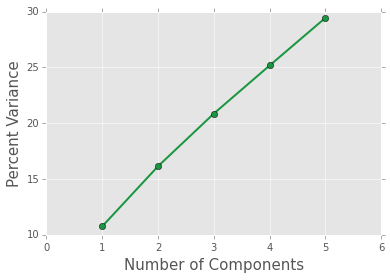

In [6]:
from pymks.tools import draw_component_variance

draw_component_variance(model.dimension_reducer.explained_variance_ratio_)


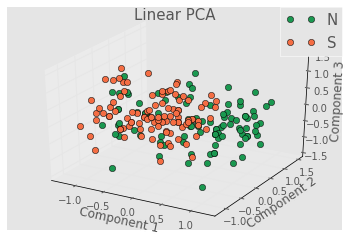

In [7]:
from pymks.tools import draw_components_scatter
draw_components_scatter([model.reduced_fit_data[0:100,:3],model.reduced_fit_data[100:200,:3]],['N','S'], title='Linear PCA')

In [11]:
from sklearn.decomposition import KernelPCA
reducer = KernelPCA(n_components=5, kernel='poly')
KernelPCA_P_model = MKSStructureAnalysis(basis=p_basis, correlations=[(0, 0)], periodic_axes=[0, 1],
                               dimension_reducer=reducer)

In [12]:
KernelPCA_P_model.fit(combined)

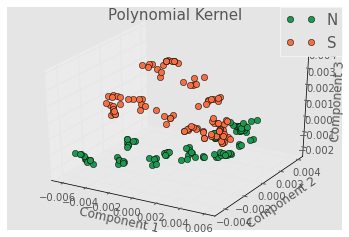

In [13]:
draw_components_scatter([KernelPCA_P_model.reduced_fit_data[0:100,:3],KernelPCA_P_model.reduced_fit_data[100:200,:3]],['N','S'], title='Polynomial Kernel')

In [17]:
from sklearn.decomposition import KernelPCA
reducer = KernelPCA(n_components=5, kernel='cosine')
KernelPCA_C_model = MKSStructureAnalysis(basis=p_basis, correlations=[(0, 0)], periodic_axes=[0, 1],
                               dimension_reducer=reducer)
KernelPCA_C_model.fit(combined)


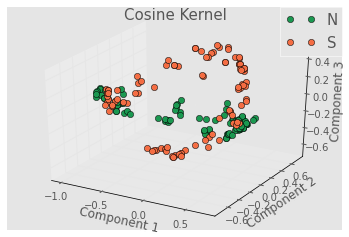

In [18]:
draw_components_scatter([KernelPCA_C_model.reduced_fit_data[0:100,:3],KernelPCA_C_model.reduced_fit_data[100:200,:3]],['N','S'], title = 'Cosine Kernel')

In [19]:
from sklearn.decomposition import KernelPCA
reducer = KernelPCA(n_components=5, kernel='rbf')
KernelPCA_R_model = MKSStructureAnalysis(basis=p_basis, correlations=[(0, 0)], periodic_axes=[0, 1],
                               dimension_reducer=reducer)
KernelPCA_R_model.fit(combined)


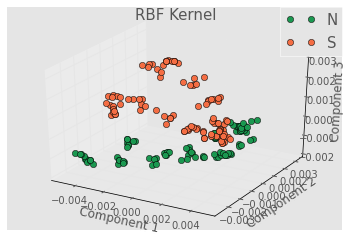

In [20]:
draw_components_scatter([KernelPCA_R_model.reduced_fit_data[0:100,:3],KernelPCA_R_model.reduced_fit_data[100:200,:3]],['N','S'], title='RBF Kernel')

In [21]:
from sklearn.decomposition import KernelPCA
reducer = KernelPCA(n_components=5, kernel='sigmoid')
KernelPCA_S_model = MKSStructureAnalysis(basis=p_basis, correlations=[(0, 0)], periodic_axes=[0, 1],
                               dimension_reducer=reducer)
KernelPCA_S_model.fit(combined)


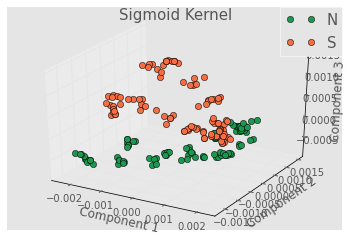

In [22]:
draw_components_scatter([KernelPCA_S_model.reduced_fit_data[0:100,:3],KernelPCA_S_model.reduced_fit_data[100:200,:3]],['N','S'],title='Sigmoid Kernel')

In [23]:
from sklearn.decomposition import FastICA
reducer = FastICA(n_components=5)
Fast_ICA_model = MKSStructureAnalysis(basis=p_basis, correlations=[(0, 0)], periodic_axes=[0, 1],
                               dimension_reducer=reducer)
Fast_ICA_model.fit(combined)


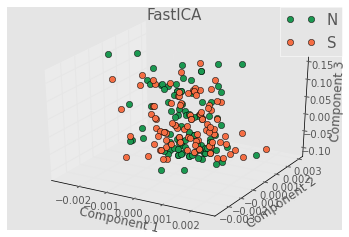

In [24]:
draw_components_scatter([Fast_ICA_model.reduced_fit_data[0:100,:3],Fast_ICA_model.reduced_fit_data[100:200,:3]],['N','S'],title='FastICA')

In [25]:

from sklearn.decomposition import TruncatedSVD
reducer = TruncatedSVD(n_components=5)
TruncatedSVD_model = MKSStructureAnalysis(basis=p_basis, correlations=[(0, 0)], periodic_axes=[0, 1],
                               dimension_reducer=reducer)
TruncatedSVD_model.fit(combined)


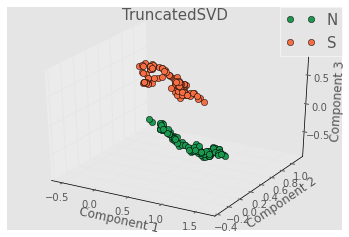

In [26]:
draw_components_scatter([TruncatedSVD_model.reduced_fit_data[0:100,:3],TruncatedSVD_model.reduced_fit_data[100:200,:3]],['N','S'],title='TruncatedSVD')